In [13]:
## Import libraries
import re
import nltk
import spacy
import string
import pickle
import numpy as np
import pandas as pd
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
from tqdm.notebook import tqdm_notebook
# Gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re
from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import matutils
from gensim.models.coherencemodel import CoherenceModel
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Load stored data
data_train = pd.read_csv(r"Data\\cleaned_training_data.csv")
original_articles, cleaned_articles, cleaned_articles_merged = pickle.load(open(r"Data\\cleaned_training_data.pkl", "rb"))

In [7]:
texts = [[word for word in article.split(" ")] for article in cleaned_articles_merged[:-1]]

In [8]:
dictionary = corpora.Dictionary(texts)
# print(dictionary.id2token) ## to see the actual dictionary generated
corpus = [dictionary.doc2bow(text) for text in texts]

In [5]:
# Load model
lda_model = pickle.load(open(r"Data\\lda_model_10.pkl", "rb"))

## Visualize LDA model

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus, total_docs=25000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [11]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
#     model_list = []
    for num_topics in tqdm_notebook(range(start, limit, step)):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
#         model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
#         model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [18]:
coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=18, limit=30, step=2)

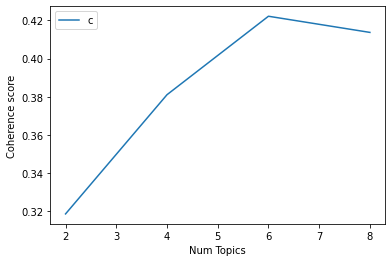

In [15]:
# Show graph
limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

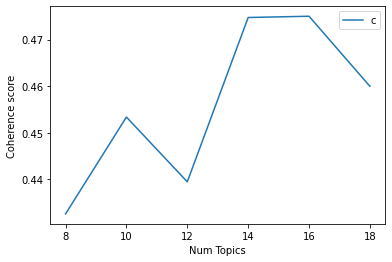

In [17]:
# Show graph
limit=20; start=8; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

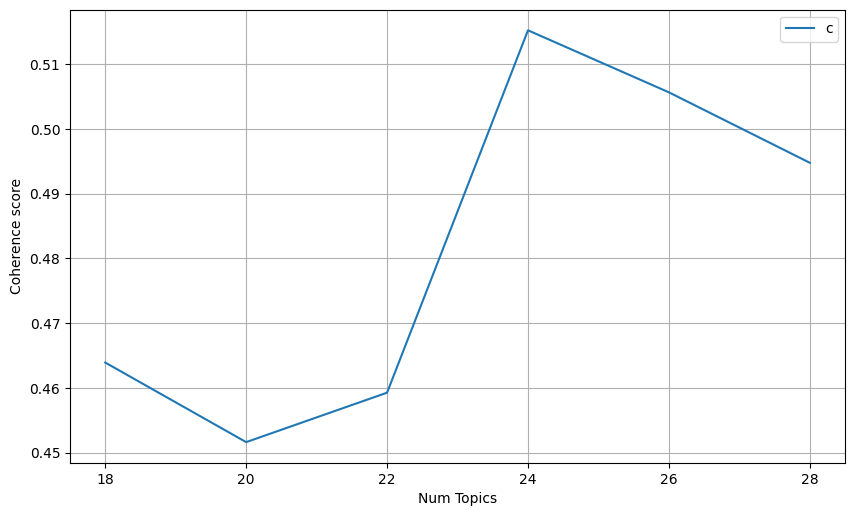

In [36]:
# Show graph
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=100)
limit=30; start=18; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.grid(True)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [20]:
coherence_values2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=28, limit=102, step=2)

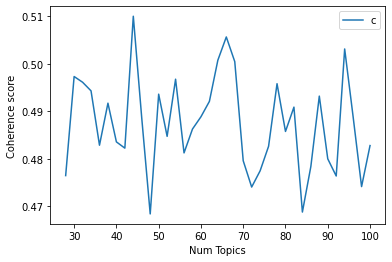

In [32]:
# Show graph
limit=102; start=28; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [31]:
coherence_values3 = [0.4638992581059315,
 0.4516074106579544,
 0.45924771804058645,
 0.5152176869623535,
 0.5056390084478912,
 0.49475789934181796,
 0.49731960336222275,
 0.49611993272629284,
 0.4943070056000913,
 0.48288101278916723,
 0.4917182988072086,
 0.48358220356594545,
 0.482263703360741,
 0.5099914909269256,
 0.48855265004046167,
 0.468438711252781,
 0.49361148405489486,
 0.48474416461531633,
 0.49675865441740247,
 0.4812665362775694,
 0.486278851183805,
 0.48885807776387197,
 0.49209297943302344,
 0.5007501485347652,
 0.5056376976071288,
 0.5004540836052835,
 0.4796157166987685,
 0.47408704725591666,
 0.4774974440774183,
 0.48265361924517824,
 0.4958118228314531,
 0.4857758037848516,
 0.49088847705750255,
 0.4688298362937517,
 0.4784074908878219,
 0.4932013849356041,
 0.4800183787053495,
 0.4764090417264024,
 0.5031137664858077,
 0.4888560647255875,
 0.47418251269353084,
 0.4828058645426243]

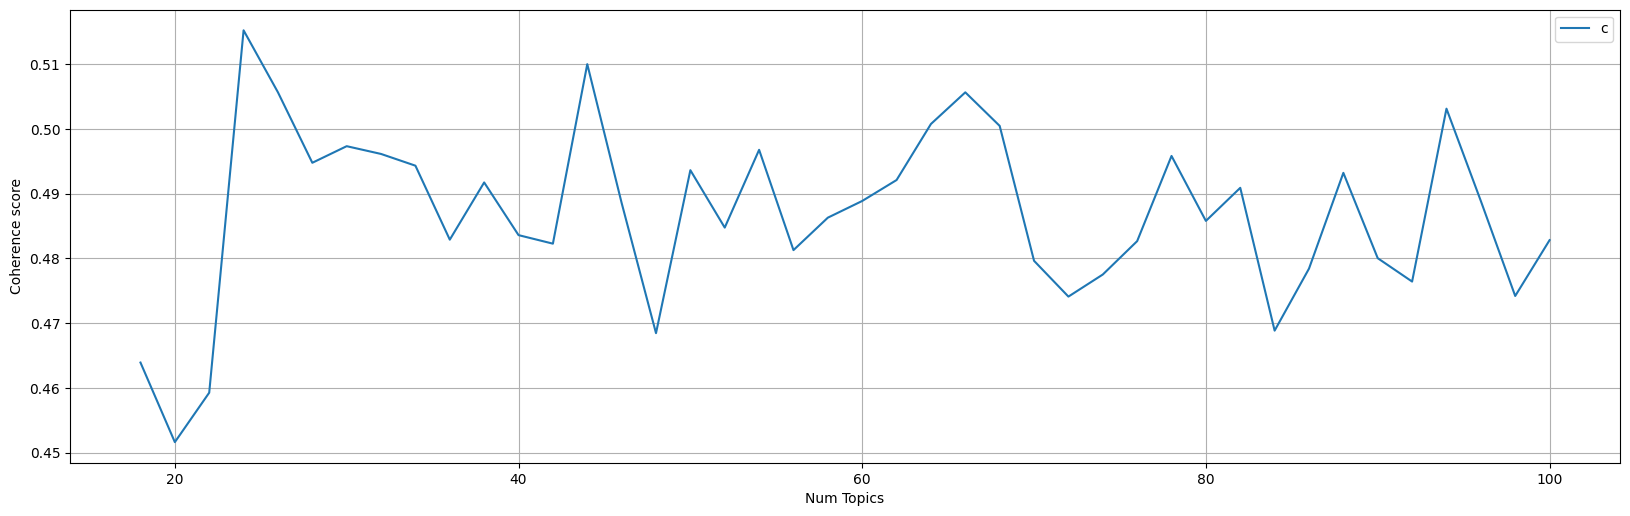

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=100)
limit=102; start=18; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.grid(True)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

## Visualize LSA model

In [39]:
def compute_coherence_values_lsa(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
#     model_list = []
    for num_topics in tqdm_notebook(range(start, limit, step)):
#         model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
#         model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [40]:
# Load models
dictionary = pickle.load(open(r"Data\\dictionary.pkl", "rb"))
corpus = pickle.load(open(r"Data\\corpus.pkl", "rb"))
texts = pickle.load(open(r"Data\\texts.pkl", "rb"))

In [41]:
coherence_values_lsa = compute_coherence_values_lsa(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=30, step=2)

  0%|          | 0/14 [00:00<?, ?it/s]

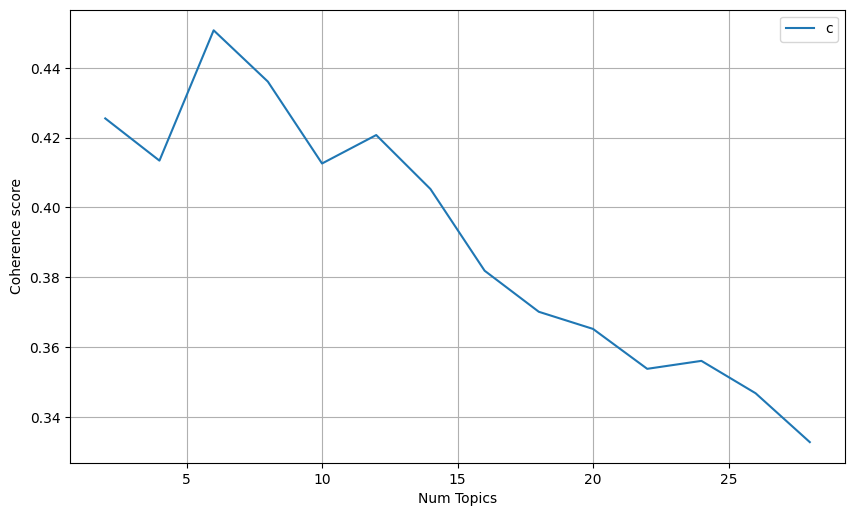

In [42]:
# Show graph
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=100)
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values_lsa)
plt.grid(True)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [46]:
limit=30; start=2; step=2;
x = range(start, limit, step)
for idx, i in enumerate(x):
    print("No.of Topics: ", i,"\n",
          "coherence score: ", coherence_values_lsa[idx])
    print("\n")

No.of Topics:  2 
 coherence score:  0.4254909587546567


No.of Topics:  4 
 coherence score:  0.4134028117240621


No.of Topics:  6 
 coherence score:  0.45071734617132403


No.of Topics:  8 
 coherence score:  0.43603710963139686


No.of Topics:  10 
 coherence score:  0.4125843798635134


No.of Topics:  12 
 coherence score:  0.4207286992627681


No.of Topics:  14 
 coherence score:  0.40527858579631065


No.of Topics:  16 
 coherence score:  0.38188266597061227


No.of Topics:  18 
 coherence score:  0.37012359394201483


No.of Topics:  20 
 coherence score:  0.365218683954748


No.of Topics:  22 
 coherence score:  0.35379076652658986


No.of Topics:  24 
 coherence score:  0.35606907105084856


No.of Topics:  26 
 coherence score:  0.34679662332974065


No.of Topics:  28 
 coherence score:  0.33280185210939217


